# From MARC to LOD: Mining and Publishing Linked Open Bibliographic Data with Python 

## Introduction
Machine Readable Cataloging (MARC) is a widely used standard for the representation and exchange of bibliographic and related information in machine-readable form. (https://www.loc.gov/marc/bibliographic/concise/bdintro.html) Developed by Henriette Avram at the Library of Congress between the 1965 and the 1968, MARC provided a framework for organizing bibliographic data (such as physical description, publication information, notes, and so on) and facilitating the management and retrieval of various bibliographic materials, ranging from textual objects to geographic maps, music, and even software. By the half of the next decade, MARC formats were everywhere and became the _de facto_ standard for structuring and publishing bibliographic data. (Avram, H. D. (1975). MARC; its History and Implications. https://files.eric.ed.gov/fulltext/ED127954.pdf)

The Semantic Web aims to create links between data and make these links understandable by machines. (...)

A related concept is Linked Open Data, which refers to a set of principles that make these links possible and afford accessibility of the interlinked data on the Web. The bottom line is: the more "things" are connected together, the more powerful, comprehensive and expandable the data about them can be.

The main benefit of publishing library data as LOD is that it makes data more _attractive_:  it becomes readily available and easier to analyze, combine, integrate, and use for researchers, system developers, librarians, and potentially even for the general public (if done correctly), as consequence of being freed out of conceptual and technical silos (such as MARC). (Best Practices for Library Linked
Open Data (LOD) Publication)

In this tutorial, we will explore a possible way to transition from MARC records to Linked Open Data using Python. We will use the [dardwinslibrary](https://archive.org/details/darwinslibrary) collection, a scholarly edition of Darwin's scientific archive, as an exemplary case study. In particular, we will go through each stage of the process and address its complexities, from collecting MARC records from the Internet Archive to leveraging Python for data cleansing, preparation, and conversion into Linked Open Data. In addition, we will do our best to document the whole process in a FAIR, transparent, and reproducible fashion.

**The code that follows is written using Python X.X.X, Pandas X.X.X and XXXX X.X.X, all running on XXX XX.XX. The complete code can be found on XXXXXX.**

## Know thy MARC

Before getting our hands dirty, we first better get to know what we are dealing with. In particular, we must ask ourselves this question: what is _exactly_ a MARC record?

The MARC standards define three aspects of a MARC record: 
* the **field designations** within each record;
* the **structure** of the record;
* the actual **content** of the record itself.

### Fields
Specific information about the item being described are expressend through **field labels** in a MARC record. These labels can include things like the author, title, publication information, and more. Each field in a record is identified with a straightforward three-digit numeric code that runs from `001` to `999`. For example, field `100` designates the work's `principal author`, field `245` the `title`, and field `260` the `publication information`. Eventual subfields are designated using single letters or numeric labels. Field 260, for instance, has several subfields, like `a` for the `publication location`, `b` for the `publisher`, and `c` for the `publication date`.

### Structure
MARC records are frequently concatenated into a single file and are normally stored and sent as binary files. Every data set has a ISO 2709-compliant framework that describes how the elements are arranged. This structure consists of an initial set of characters that serve as a directory for finding fields and subfields within the record, as well as a marker that indicates the start and finish of each record. 

### Content
MARC records information about a bibliographic item by emphasizing its metadata over its actual content. As such, it serves as a metadata transfer standard as opposed to a content standard. Only the contents of a few fixed fields are specified by the MARC standards themselves; thus, the specific data entered into each MARC field are usually determined by external standards, such as RDA for physical descriptions and LCSH for subject terms.

## Import needed libraries

In the initial step of our data conversion process, we begin by importing essential Python libraries for carrying out the process:
* `os`: This library provides a platform-independent interface for interacting with the operating system, facilitating tasks such as file and directory operations.
* `re`: Regular expressions are a powerful tool for pattern matching and string manipulation. The 're' library empowers us to efficiently navigate and extract relevant information from our MARC records.
* `pymarc`: Central to our mission, the 'pymarc' library allows us to work with MARC data effortlessly. Its functionality enables parsing, editing, and processing MARC records, essential for our data mining endeavors.
* `internetarchive` (`ia`): Leveraging the 'internetarchive' library grants us access to the Internet Archive, a rich repository of bibliographic records. This connection is fundamental for retrieving the data from the specified collection.
* `pandas` (`pd`): As a robust data manipulation and analysis library, 'pandas' is indispensable for organizing, cleaning, and transforming our data.
* `missingno` (`msgno`): Data quality is paramount, and 'missingno' aids us in visualizing missing data patterns within our dataset.
* `pyarrow` (`pa`): ...
* `parquet` (`pq`): ...
* `json`: ...
* `pathlib`: ...

In [1]:
import os, re, pymarc, json, pathlib
import internetarchive as ia
import pandas as pd
import missingno as msgno
import pyarrow as pa
import pyarrow.parquet as pq
%matplotlib inline
pd.options.display.max_rows = 100

## Data Gathering

In this initial step, we kick off the process of gathering bibliographic records from the `darwinslibrary` collection on the Internet Archive.

In [2]:
# Define the name of the collection on Internet Archive
collection_name = "darwinslibrary"

# Define the path where the files will be saved
save_path = "marc-files"

# Create the directory if it doesn't exist
if not os.path.exists(save_path):
    os.mkdir(save_path)

# Search for items in the collection
items = ia.search_items(f'collection:{collection_name}')

The variable `collection_name` is set to "darwinslibrary," pointing to the specific collection we are interested in on the Internet Archive. The variable `save_path` determines where the collected MARC files will be stored. If the chosen directory doesn't exist, the code makes it on the fly, keeping things neat and organized. We also make sure the storage directory exists; if it doesn't, the code creates a new one named "marc-files." This ensures a smooth process by providing a clear place for our collected data. Finally, by using the `internetarchive` library, the code searches for items in the specified collection.

Now, let's get the nitty-gritty, and snag those MARCXML records for each item in our collection.

In [3]:
'''
# For each item, download the MARCXML record
for item in items:

    # Get the item identifier
    identifier = item["identifier"]
    
    # Try to download the record with that identifier, in MARC format, at the `save_path` destination, and do not create a new folder for each file
    try:
        xml_files = ia.download(identifier, 
                                formats=["MARC"], 
                                verbose=True, 
                                destdir=save_path,
                                no_directory=True)

    # If there is a error, print it
    except Exception as e:
        print(e)
'''

'\n# For each item, download the MARCXML record\nfor item in items:\n\n    # Get the item identifier\n    identifier = item["identifier"]\n    \n    # Try to download the record with that identifier, in MARC format, at the `save_path` destination, and do not create a new folder for each file\n    try:\n        xml_files = ia.download(identifier, \n                                formats=["MARC"], \n                                verbose=True, \n                                destdir=save_path,\n                                no_directory=True)\n\n    # If there is a error, print it\n    except Exception as e:\n        print(e)\n'

First, we systematically navigate through each item by referencing its unique identifier. Then, we employ the `internetarchive` library to fetch MARCXML records for each item. These records are then stored in the specified directory denoted by `save_path`. The `verbose=True` ensures the system returns a clear view of each execution of the processes. Lastly, we place a error handling mechanism to print any unforeseen issues that may arise during the download process.

Now our focus shifts to extracting essential metadata from the previously acquired MARCXML records. Our objective is to mine pertinent information such as author, title, notes, supplemental material details, and publication specifics.

We start by defining a list in which we will store each record's data as a dictionary.

In [4]:
# Prepare the list of dictionaries
data = []

Then, we will define a series of functions, each dedicated in capturing a specific facet of information regarding a record (e.g. its identifier, author, title, etc.). Luckily enough, the input files are written in MARCXML, an XML-based schema that follows MARC structures and terminology, and this makes our extraction job infinitely easier.

In [5]:
def get_author(record):
    '''
    Get the "author" metadata from a MARCXML record.

    Args:
        record (file): a MARCXML file containing the metadata of a record.

    Returns:
        author (str): a string containing the name of the author extracted from the MARCXML file.
    '''
    try:
        author = record['100']['a']
        return author
    except Exception as e:
        print(e)

In [6]:
def get_title(record):
    '''
    Get the "title" metadata from a MARCXML record.

    Args:
        record (file): a MARCXML file containing the metadata of a record.

    Returns:
        title (str): a string containing the title of the record extracted from the MARCXML file.
    '''
    try:
        title = record['245']['a']
        return title
    except Exception as e:
        print(e)

In [7]:
def get_subtitle(record):
    '''
    Get the "subtitle" metadata from a MARCXML record.

    Args:
        record (file): a MARCXML file containing the metadata of a record.

    Returns:
        subtitle (str): a string containing the subtitle of the record extracted from the MARCXML file.
    '''
    try:
        subtitle = record['245']['b']
        return subtitle
    except Exception as e:
        print(e)

In [8]:
def get_pub_place(record):
    '''
    Get the "publication place" metadata from a MARCXML record.

    Args:
        record (file): a MARCXML file containing the metadata of a record.

    Returns:
        pub_place (str): a string containing the name of the publication place extracted from the MARCXML file.
    '''
    try:
        pub_place = record['260']['a']
        return pub_place
    except Exception as e:
        print(e)

In [9]:
def get_publisher(record):
    '''
    Get the "publisher" metadata from a MARCXML record.

    Args:
        record (file): a MARCXML file containing the metadata of a record.

    Returns:
        publisher (str): a string containing the name of the publisher extracted from the MARCXML file.
    '''
    try:
        publisher = record['260']['b']
        return publisher
    except Exception as e:
        print(e)

In [10]:
def get_pub_date(record):
    '''
    Get the "publication date" metadata from a MARCXML record.

    Args:
        record (file): a MARCXML file containing the metadata of a record.

    Returns:
        pub_date (str): a string containing the publication date extracted from the MARCXML file.
    '''
    try:
        pub_date = record['260']['c']
        return pub_date
    except Exception as e:
        print(e)

In [11]:
def get_note(record):
    '''
    Get the "note" metadata from a MARCXML record.

    Args:
        record (file): a MARCXML file containing the metadata of a record.

    Returns:
        notes (list): a list of strings containing notes extracted from the MARCXML file.
    '''
    try:
        notes = [note['a'] for note in record.get_fields('500')]
        return notes
    except Exception as e:
        print(e)

In [12]:
def get_ident(lst):
    '''
    Get the "identifier" metadata from a MARCXML record.

    Args:
        record (file): a MARCXML file containing the metadata of a record.

    Returns:
        ident (str): a string containing the identifier extracted from the MARCXML file.
    '''
    try:
        for strng in lst:
            if strng.startswith('Identifier'):
                ident = strng[12:]
                return ident
    except Exception as e:
        print(e)

In [13]:
def get_alt_ident(lst):
    '''
    Get alternative identifier metadata from a MARCXML record.

    Args:
        record (file): a MARCXML file containing the metadata of a record.

    Returns:
        ident (str): a string containing an alternative identifier extracted from the MARCXML file.
    '''
    try:
        for strng in lst:
            if strng.startswith('Public number: '):
                ident = strng[15:]
                return ident
    except Exception as e:
        print(e)

In [14]:
def get_supp_material(record):
    '''
    Get the "supplement special issue entry" metadata from a MARCXML record.

    Args:
        record (file): a MARCXML file containing the metadata of a record.

    Returns:
        supp_material (str): a string containing the identifier of the supplement special issue entry extracted from the MARCXML file.
    '''
    try:
        supp_material = record['770']['o']
        return supp_material
    except Exception as e:
        print(e)

In [15]:
def get_supp_parent(record):
    '''
    Get the "supplement parent entry" metadata from a MARCXML record.

    Args:
        record (file): a MARCXML file containing the metadata of a record.

    Returns:
        supp_parent (str): a string containing the identifier of the supplement parent entry extracted from the MARCXML file.
    '''
    try:
        supp_parent = record['772']['o']
        return supp_parent
    except Exception as e:
        print(e)

For each record, a dictionary is created, encapsulating the metadata attributes we are going to extract. These include:
- `ID`: the identifier of the record;
- `ALT_ID`: an alternative identifier, extracted from the free text in the `note` field;
- `AUTHOR`: the author's full name;
- `TITLE`: the title of the bibliographic work;
- `SUBTITLE`: the subtitle of the bibliographic work;
- `NOTE`: any textual note about the bibliographic work;
- `SUPP_MATERIAL`: the identifier of supplemental material, if any;
- `SUPP_PARENT`: the identifier of the parent record of supplementary material, if any;
- `PUB_PLACE`: the name of the place of publication;
- `PUBLISHER`: the name of the publisher;
- `PUB_DATE`: the full publication date.

The dictionaries are appended to the `data` list, creating a structured repository of bibliographic metadata.

In [16]:
# Iterate over the folder
for filename in os.listdir(save_path):

    # Construct the path to the MARCXML file in the current folder
    file_path = os.path.join(save_path, filename)

    # Check if the file exists at that path
    if os.path.isfile(file_path):
        
        # Open the MARCXML file and return the records within it as an array
        with open(file_path, 'rb') as marc_file:
            records = pymarc.marcxml.parse_xml_to_array(marc_file)
    
            # Iterate over the MARC records array and generate a dictionary for each record
            for record in records:
                dct = {
                    'ID': get_ident(get_note(record)),
                    'ALT_ID': get_alt_ident(get_note(record)),
                    'AUTHOR': get_author(record),
                    'TITLE': get_title(record),
                    'SUBTITLE': get_subtitle(record),
                    'NOTE': ' '.join(get_note(record)),
                    'SUPP_MATERIAL': get_supp_material(record),
                    'SUPP_PARENT': get_supp_parent(record),
                    'PUB_PLACE': get_pub_place(record),
                    'PUBLISHER': get_publisher(record),
                    'PUB_DATE': get_pub_date(record)
                }
                data.append(dct)

In order to make the functions work, we need to use `pymarc.marcxml.parse_xml_to_array`, a function from the `pymarc` library that allows parsing an XML file to return the records as an array. Then, each function is called on each record to populate the dictionary structure that in turn is added to the `data` list.

## Data Exploration

Our main reason to organize our data into a list of dictionaries is to easily convert it into a **DataFrame**, a widely used data structure provided by the `pandas` library that consists of rows and columns, similarly to a table or spreadsheet.

To convert our list of dictionaries into a DataFrame, we simply instantiate it with our list of dictionaries as parameter.

In [17]:
# Create a DataFrame out of the list of dictionaries
df = pd.DataFrame(data)

Now that we have organized our data into a DataFrame `df`, we can use a series of utility functionalities to gain a better understanding of it. For example, to have a quick look at the data inside our DataFrame, we can use the `.head()` function to return its first five rows.

In [18]:
# Use .head() and print the first five rows
df.head()

,ID,ALT_ID,AUTHOR,TITLE,SUBTITLE,NOTE,SUPP_MATERIAL,SUPP_PARENT,PUB_PLACE,PUBLISHER,PUB_DATE
0,Le-Couteur2006nw21J_MS.,None,"Darwin, Charles.",On the varieties of wheat. :,[Supplementary material in Charles Darwin's co...,Identifier: Le-Couteur2006nw21J_MS.,None,Le-Couteur2006nw21J,None,None,None
1,Bell1844nu34M.,0085.,"Bell, Charles.",The anatomy and philosophy of expression.,None,Signature E. Darwin 1844 to Ch. Darwin Nov. 28...,Bell1844nu34M_MS,None,London :,"John Murray,",1844.
2,Bell1844nu34M_MS.,None,"Darwin, Charles.",The anatomy and philosophy of expression. :,[Supplementary material in Charles Darwin's co...,Identifier: Bell1844nu34M_MS.,None,Bell1844nu34M,None,None,None
3,Piderit1867fn81L.,1076.,"Piderit, T.",Wissenschaftliches System der Mimik und Physio...,None,Location: Cambridge. Identifier: Piderit1867fn...,Piderit1867fn81L_MS,None,Detmold :,"Klingenberg,",1867.
4,None,None,"Weismann, August,",Uber den Einfluss der Isolirung auf die Artbil...,None,,None,None,Leipzig :,"Verlag von Wilhelm Engelmann,",1872


We can also look at a random sample of rows through the `.sample()` method.

In [19]:
df.sample(10)

,ID,ALT_ID,AUTHOR,TITLE,SUBTITLE,NOTE,SUPP_MATERIAL,SUPP_PARENT,PUB_PLACE,PUBLISHER,PUB_DATE
267,None,None,"McClintock, Francis Leopold,",The Voyage of the 'Fox' in the Arctic Seas :,a narrative of the discovery of the fate of Si...,,None,None,"London,",John Murray;,1859.
48,None,None,"Puvis, Marc Antoine,",De la dégénération et de l'extinction des v...,None,,None,None,Paris :,Huzard ;,1837
132,None,None,"Pernety, Antoine Joseph,",Journal historique d'un voyage fait aux I^les ...,None,,None,None,Berlin :,"Etienne de Bourdeaux,",1769
74,Kirby2006fz26R_MS.,None,"Darwin, Charles.",An introduction to entomology. :,[Supplementary material in Charles Darwin's co...,Identifier: Kirby2006fz26R_MS.,None,Kirby2006fz26R,None,None,None
120,None,None,"Audubon, John James,","Ornithological biography, or an account of the...",accompanied by descriptions of the objects rep...,"Vol. 5 erroneously dated 1849. ""I feel pleasur...",None,None,Edinburgh :,"Adam Black,",1831-1839.
89,Jaeger2006ju99N_MS.,None,"Darwin, Charles.",Die Darwin'sche Theorie und ihre Stellung zu M...,[Supplementary material in Charles Darwin's co...,Identifier: Jaeger2006ju99N_MS.,None,Jaeger2006ju99N,None,None,None
81,Tegetmeier1854kr04O_MS.,None,"Darwin, Charles.",Profitable poultry. :,[Supplementary material in Charles Darwin's co...,Identifier: Tegetmeier1854kr04O_MS.,None,Tegetmeier1854kr04O,None,None,None
233,None,None,"Herschel, John Frederick William,",A manual of scientific enquiry :,prepared for the use of Her Majesty's Navy and...,Printed by William Clowes and Sons.,None,None,London :,"John Murray,",1849.
107,None,None,"Dodel-Port, Arnold.",Die Neuere Schopfungsgeschichte nach dem gegen...,None,,None,None,"Leipzig,",None,1875.
5,Kirby2006fz26R.,0729.,"Kirby, William.",An introduction to entomology.,None,"Pre-Beagle. 3rd edn, vol. 1 (1818), 2nd edn, v...",Kirby2006fz26R_MS,None,London :,"Longman, Hurst, Rees, Orme & Brown,",1818-1826.


In case you noticed, we can already notice some interesting quirks in the data. For example:
- identifiers, names and notes seem to follow consistent patterns in their representation (such as `Surname, Name` for `AUTHOR` values);
- `ID` values contain both uppercase and lowercase characters, and end with a period;
- `ALT_ID` values end with a period;
- `AUTHOR` values often end with a period or a comma;
- `SUPP_MATERIAL` and `SUPP_PARENT` contain both uppercase and lowercase characters, and are complementary with each other (the non-null values in one column can fill the null cells in the other column, and vice versa);
- `PUB_PLACE` and `PUBLISHER` values often end with a combination of punctuation and whitespace, and sometimes their null values are expressed through the string "[s.n.]";
- `PUB_DATE` values often end with a period, sometimes they might be enclosed in square parentheses, sometimes they might actually represent a period of time (e.g. two dates connected with an hyphen), and their null values are expressed through the string "n.d."

We are still not done exploring, though. We can use `.shape`, `.info()` and `.describe(include='all')` functions to visualize the Dataframe's dimensionality (number of rows and columns), general information, and descriptive statistics.

In [20]:
df.shape

(315, 11)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             264 non-null    object
 1   ALT_ID         140 non-null    object
 2   AUTHOR         312 non-null    object
 3   TITLE          315 non-null    object
 4   SUBTITLE       148 non-null    object
 5   NOTE           315 non-null    object
 6   SUPP_MATERIAL  132 non-null    object
 7   SUPP_PARENT    124 non-null    object
 8   PUB_PLACE      191 non-null    object
 9   PUBLISHER      183 non-null    object
 10  PUB_DATE       191 non-null    object
dtypes: object(11)
memory usage: 27.2+ KB


In [22]:
df.describe(include='all')

,ID,ALT_ID,AUTHOR,TITLE,SUBTITLE,NOTE,SUPP_MATERIAL,SUPP_PARENT,PUB_PLACE,PUBLISHER,PUB_DATE
count,264,140,312,315,148,315,132,124,191,183,191
unique,230,122,133,270,18,240,114,108,34,116,98
top,Lyell1837jf09J.,0729.,"Darwin, Charles.","Ornithological biography, or an account of the...",[Supplementary material in Charles Darwin's co...,,Kirby2006fz26R_MS,Kirby2006fz26R,London :,"John Murray,",1865.
freq,4,4,124,5,124,37,4,4,68,11,8


Now we are aware of some other important aspects of our data. For example, considering the number of rows (_and thus values per column_) is 315, we can already notice how some values are missing: as a matter of fact, only `TITLE` and `NOTE` are completely populated; however, seeing how the top value for `NOTE` (with a total frequency of 37) is empty, we can infer that at least 37 values in this column are empty values probably consisting in one or more whitespaces (that are still counted as actual values!). Moreover, now we also know that 34 identifiers (264-230) are _not_ unique.

## Data documentation

... but wait! Before getting into data cleaning, we better do our best to follow data management good practices. Themes like FAIR Principles (...) and reproducibility (...) open up whole new worlds to explore, and we certainly do not have the time nor the space to deal with their intricacies right now, but in the meantime it can be useful to pick up from them one suggestion or two about how to make our scientific computing endeavor... well, scientific. 

An excellent way to start documenting what we are doing is by using metadata (supplementary information that describes another object). Metadata is fundamental in data documentation, since it provides context, such as when, where and how the object it refers to was created. Collection and storage of metadata should be considered a key feature to include in data processing endeavors. In particular, we should attach some metadata to our outputs (such as the DataFrame we just created) in order to track the data lifecycle and thus ensuring transparency in all its stages.

But how best to do this?

Unfortunately, Pandas is not that great when it comes to managing metadata, since there is no conventional way to attach it to a DataFrame. So, how do we couple a DataFrame and its relevant metadata together in a portable and durable format?

[This Darren SMith's article](https://towardsdatascience.com/saving-metadata-with-dataframes-71f51f558d8e) provides an excellent approach to implement this by using **Parquet** (a file format for storing tabular data efficiently) and **Arrow** (a mechanism to store tabular data in memory). We will first use Arrow to convert the DataFrame to an Arrow table and then attach metadata to it. This enriched table will then be saved as a Parquet file. Additionally, we will see how to restore the DataFrame and metadata from the saved file.

For the task at hand, we can express the dataset metadata as a construct that can be easily serialized to JSON (e.g. a Python dictionary) and that follows some predefined conceptual schema. 

For this example, we will use some of the existing metadata associated with the original collection to describe the DataFrame we created.

In [23]:
collection = ia.get_item('darwinslibrary')

metadata = {
    'identifier': f'{collection.metadata["identifier"]}',
    'title': f'{collection.metadata["title"]}',
    'description': f'{collection.metadata["description"]}',
    'creator': f'{collection.metadata["uploader"]}',
    'created': f'{collection.metadata["addeddate"]}',
    'subject': f'{collection.metadata["collection"]}',
    'source': f'{collection.metadata["identifier-access"]}'
}

print(metadata)

{'identifier': 'darwinslibrary', 'title': 'darwinslibrary', 'description': 'A scholarly edition of <a href="http://darwin.amnh.org/" target="_blank">Darwin\'s<a> scientific archive.', 'creator': 'ginger@archive.org', 'created': '2010-08-10 00:08:35', 'subject': "['biodiversity', 'texts']", 'source': 'http://www.archive.org/details/darwinslibrary'}


The following code follows the instructions in Smith's article in order to couple a DataFrame with its metadata as a Parquet file.

In [24]:
# define unique key for custom metadata
meta_key = 'darwinsarchive.iot'

# use PyArrow to convert the DataFrame into an Arrow table
table = pa.Table.from_pandas(df)

# construct a new Arrow table that is a copy of `table`, 
# but with its native metadata replaced by a combination of 
# the existing metadata and our custom metadata
meta_json = json.dumps(metadata)
existing_meta = table.schema.metadata
combined_meta = {
    meta_key.encode() : meta_json.encode(),
    **existing_meta
}
table = table.replace_schema_metadata(combined_meta)

# save the Arrow table as a `.parquet` file by using the `parquet` library
pq.write_table(table, '2024-01-16_darwinslibrary_v01.parquet', compression='GZIP')

Et voilà! Our DataFrame and its metadata are now coupled together in single Parquet file.

## Data cleaning
Now we can take up from where we left off: cleaning our dataset squeaky clean! 

Data cleaning is a crucial step in the data analysis process, involving the identification, correction, and removal of inaccuracies, inconsistencies, and errors in datasets. This process ensures that the data is accurate, complete, and reliable for further analysis. Common data cleaning tasks include handling missing values, correcting data entry errors, standardizing formats, removing duplicate records, and dealing with outliers. 

In our case, cleaning our bibliographic data means dealing with all the abnormalities we highlighted in the previous section. To do this, we will use more Python functions. 

First, we define the necessary function to eliminate trailing those pesky punctuation and whitespaces.

In [25]:
def clean_trailing_punctuation(value):
    '''
    Clean trailing punctuation from each value in a DataFrame.

    Args:
        value (str): a string value contained in a DataFrame cell.

    Returns:
        value (str): a string containing the value cleaned from any existing trailing punctuation.
    '''
    try:
        value = re.sub(r'^[.,!\[\]?:;]|[.,!\[\]?:;]$', '', value)
        value = value.strip()
    except:
        None
    return value

Also, we create another function deal with existing values that are used in a non-standard manner, like those "[s.n.]" and "n.d." strings.

In [26]:
def normalize_missing_value(value):
    '''
    Normalizes a missing value in a DataFrame into a None value.

    Args:
        value (str): a string value contained in a DataFrame cell.

    Returns:
        value (str): a string containing a None value if the input value contains "[s.n.]" or "n.d.".
    '''
    try:
        value = re.sub(r'\[s.n.\]|n.d.', 'NaN', value)
    except:
        None
    return value

Then, we create a third function to deal with periods of time (e.g. "1854-1862"). We could deal with time intervals in various ways, but for the sake of simplicity we will take into consideration only the starting year of the interval (e.g. "1854").

In [27]:
def remove_additional_date(value):
    '''
    Normalizes a time period by considering only the start date.

    Args:
        value (str): a string value contained in a DataFrame cell.

    Returns:
        value (str): a string containing only a date.
    '''
    try:
        value_split = value.split('-')
        value = value_split[0]
    except:
        None
    return value

Finally, we can use `.apply()` to execute the functions we just defined to the respective columns of the DataFrame.

In [28]:
# Apply functions
columns_to_clean = [
    'ID', 
    'ALT_ID', 
    'TITLE', 
    'NOTE', 
    'AUTHOR', 
    'PUBLISHER', 
    'PUB_PLACE', 
    'PUB_DATE'
]
columns_to_normalize = ['PUB_PLACE', 'PUBLISHER', 'PUB_DATE']
columns_to_remove_date = ['PUB_DATE']

df[columns_to_clean] = df[columns_to_clean].map(clean_trailing_punctuation)
df[columns_to_normalize] = df[columns_to_normalize].map(normalize_missing_value)
df[columns_to_remove_date] = df[columns_to_remove_date].map(remove_additional_date)

Let us take another look to a sample of the dataset to verify the changes.

In [29]:
df.sample(10)

,ID,ALT_ID,AUTHOR,TITLE,SUBTITLE,NOTE,SUPP_MATERIAL,SUPP_PARENT,PUB_PLACE,PUBLISHER,PUB_DATE
52,Geoffroy-Saint-Hilaire1854if15J_MS,None,"Darwin, Charles",Histoire naturelle générale des règnes organiq...,[Supplementary material in Charles Darwin's co...,Identifier: Geoffroy-Saint-Hilaire1854if15J_MS,None,Geoffroy-Saint-Hilaire1854if15J,None,None,None
259,None,None,"Playfair, John",Illustrations of the Huttonian theory of the e...,None,,None,None,London,Cadell and Davies,1802
118,Scott1878nm85C,1224,"Scott, John",Report on the experimental culture of the opiu...,None,Inscription. Location: Cambridge. Identifier: ...,Scott1878nm85C_MS,None,Calcutta,Bengal Secretariat Press,1878
196,Huber1810md07U,0650,"Huber, Pierre",Recherches sur les moeurs des fourmis indigènes,None,Pre-Beagle. Location: Cambridge. Identifier: H...,Huber1810md07U_MS,None,Paris,J. J. Paschoud,1810
262,Sageret1826qj49W,1182,"Sageret, Michel",Mémoire sur les Cucurbitacées,None,Location: Cambridge. Identifier: Sageret1826qj...,Sageret1826qj49W_MS,None,Paris,Huzard,1826
275,Naudin1862ra20Z,1000,"Naudin, Charles",Nouvelles recherches sur l'hybridité dans les ...,None,Inscription. Location: Cambridge. Identifier: ...,Naudin1862ra20Z_MS,None,Paris,s.n.],1862
38,Gray1856zd45X,0498,"Gray, Asa",Manual of the botany of the northern United St...,None,Location: Cambridge. Identifier: Gray1856zd45X...,Gray1856zd45X_MS,None,New York,s.n.],1856
141,Geoffroy-Saint-Hilaire1854if15J,0466,"Geoffroy Saint Hilaire, Isidore",Histoire naturelle générale des règnes organiques,None,Location: Cambridge. Identifier: Geoffroy-Sain...,Geoffroy-Saint-Hilaire1854if15J_MS,None,Paris,Victor Masson,1854
162,Haberlandt1877uo95E_MS,None,"Darwin, Charles",Die Schutzeinrichtungen in der Entwickelung de...,[Supplementary material in Charles Darwin's co...,Identifier: Haberlandt1877uo95E_MS,None,Haberlandt1877uo95E,None,None,None
210,Bernhardi1834ez86I,0098,"Bernhardi, Johann Jacob",über den Begriff der Pflanzenart und seine Anw...,None,Location: Cambridge. Identifier: Bernhardi1834...,Bernhardi1834ez86I_MS,None,Erfurt,Friedrich Wilhelm Otto,1834


## Data Preprocessing

...

In [44]:
df[df.duplicated(keep=False)]

,ID,ALT_ID,AUTHOR,TITLE,SUBTITLE,NOTE,PUB_PLACE,PUBLISHER,PUB_DATE,FULL_TITLE,RELATED
5,Kirby2006fz26R,0729,"Kirby, William",An introduction to entomology,None,"Pre-Beagle. 3rd edn, vol. 1 (1818), 2nd edn, v...",London,"Longman, Hurst, Rees, Orme & Brown",1818,An introduction to entomology,Kirby2006fz26R_MS
9,Geoffroy-Saint-Hilaire1832xs96J,0465,"Geoffroy Saint Hilaire, Isidore",Histoire générale et particulière des anomalie...,None,Location: Cambridge. Identifier: Geoffroy-Sain...,Paris,J.B. Baillière,1832,Histoire générale et particulière des anomalie...,Geoffroy-Saint-Hilaire1832xs96J_MS
19,Lyell1837jf09J,0843,"Lyell, Charles",Principles of geology,None,Location: Cambridge. Identifier: Lyell1837jf09...,London,John Murray,1837,Principles of geology,Lyell1837jf09J_MS
24,None,None,"Lyell, Charles",Principles of geology,or the modern changes of the earth and its inh...,,London,John Murray,1867,Principles of geology or the modern changes of...,None
31,Geoffroy-Saint-Hilaire1832xs96J_MS,None,"Darwin, Charles",Histoire générale et particulière des anomalie...,[Supplementary material in Charles Darwin's co...,Identifier: Geoffroy-Saint-Hilaire1832xs96J_MS,None,None,None,Histoire générale et particulière des anomalie...,Geoffroy-Saint-Hilaire1832xs96J
35,Geoffroy-Saint-Hilaire1854if15J,0466,"Geoffroy Saint Hilaire, Isidore",Histoire naturelle générale des règnes organiques,None,Location: Cambridge. Identifier: Geoffroy-Sain...,Paris,Victor Masson,1854,Histoire naturelle générale des règnes organiques,Geoffroy-Saint-Hilaire1854if15J_MS
39,None,None,"Murphy, Joseph John",Habit and intelligence in their connexion with...,a series of scientific essays.,Published in two volumes,London,Macmillan,1869,Habit and intelligence in their connexion with...,None
43,None,None,La Cépède,Histoire naturelle des cétacées. Tom. 1,None,,Paris,Didot,1809,Histoire naturelle des cétacées. Tom. 1,None
49,Geoffroy-Saint-Hilaire1832xs96J_MS,None,"Darwin, Charles",Histoire générale et particulière des anomalie...,[Supplementary material in Charles Darwin's co...,Identifier: Geoffroy-Saint-Hilaire1832xs96J_MS,None,None,None,Histoire générale et particulière des anomalie...,Geoffroy-Saint-Hilaire1832xs96J
50,Godron1859xy77H,0476,"Godron, Dominique Alexandre",De l'espèce et des races dans les êtres organi...,None,Location: Cambridge. Identifier: Godron1859xy7...,Paris,J.B. Baillière et Fils,1859,De l'espèce et des races dans les êtres organi...,Godron1859xy77H_MS


In [ ]:
# df = df.drop_duplicates(keep='first')

In [31]:
df['FULL_TITLE'] = df['TITLE'] + ' ' + df['SUBTITLE']
df['FULL_TITLE'] = df['FULL_TITLE'].fillna(df['TITLE'])
df['FULL_TITLE']

0      On the varieties of wheat. [Supplementary mate...
1               The anatomy and philosophy of expression
2      The anatomy and philosophy of expression. [Sup...
3      Wissenschaftliches System der Mimik und Physio...
4      Uber den Einfluss der Isolirung auf die Artbil...
                             ...                        
310    Beitrage zur Biologie und Morphologie der Orch...
311    über die Eigenschaften welche sich bei Mensche...
312    Primitive marriage. [Supplementary material in...
313                                 Manual of mineralogy
314    Versuche und Beobachtungen über die Bastarderz...
Name: FULL_TITLE, Length: 315, dtype: object

First, we merge the two columns referring to supplemental resources `SUPP_MATERIAL` and `SUPP_PARENT` into one called `RELATED`; then, since they are no longer needed, we remove them from the DataFrame.

In [32]:
df['RELATED'] = df['SUPP_MATERIAL'].fillna(df['SUPP_PARENT'])
df['RELATED']

0       Le-Couteur2006nw21J
1          Bell1844nu34M_MS
2             Bell1844nu34M
3       Piderit1867fn81L_MS
4                      None
               ...         
310                    None
311    Hofacker1828vf53Y_MS
312       Mclennan1865gg67O
313     Jameson1821sp55X_MS
314        Gartner1849ne02U
Name: RELATED, Length: 315, dtype: object

In [33]:
df = df.drop(columns=['SUPP_MATERIAL', 'SUPP_PARENT'])

In [34]:
df.sample(10)

,ID,ALT_ID,AUTHOR,TITLE,SUBTITLE,NOTE,PUB_PLACE,PUBLISHER,PUB_DATE,FULL_TITLE,RELATED
17,Metzger1841td81M,0919,"Metzger, Johann",Die Getreidearten und Wiesengräser,None,Location: Cambridge. Identifier: Metzger1841td...,Heidelberg,C.F. Winter,1841,Die Getreidearten und Wiesengräser,Metzger1841td81M_MS
182,Muller1838na12J_MS,None,"Darwin, Charles",Elements of physiology.,[Supplementary material in Charles Darwin's co...,Identifier: Muller1838na12J_MS,None,None,None,Elements of physiology. [Supplementary materia...,Muller1838na12J
274,Dixon1851fy19H,0330,"Dixon, Edmund Saul",The dovecote and the aviary,None,Location: Cambridge. Identifier: Dixon1851fy19...,London,John Murray,1851,The dovecote and the aviary,Dixon1851fy19H_MS
44,Barker-Webb1840yf41S,0063,"Barker-Webb, Philip",Histoire naturelle des Îles Canaries,None,Location: Cambridge. Identifier: Barker-Webb18...,Paris,Béthune,1840,Histoire naturelle des Îles Canaries,Barker-Webb1840yf41S_MS
14,Barker-Webb1840yf41S_MS,None,"Darwin, Charles",Histoire naturelle des Îles Canaries.,[Supplementary material in Charles Darwin's co...,Identifier: Barker-Webb1840yf41S_MS,None,None,None,Histoire naturelle des Îles Canaries. [Supplem...,Barker-Webb1840yf41S
93,Hooker2006yr09F_MS,None,"Darwin, Charles",Introductory essay to the flora of New Zealand.,[Supplementary material in Charles Darwin's co...,Identifier: Hooker2006yr09F_MS,None,None,None,Introductory essay to the flora of New Zealand...,Hooker2006yr09F
126,Nathusius1872tn22V,0994,"Nathusius, Hermann von",Vorträge über Viehzucht und Rassenkenntnis,None,Location: Cambridge. Identifier: Nathusius1872...,Berlin,Wiegandt & Hempel,1872,Vorträge über Viehzucht und Rassenkenntnis,Nathusius1872tn22V_MS
95,Owen1846yu33N_MS,None,"Darwin, Charles",A history of British fossil mammals and birds.,[Supplementary material in Charles Darwin's co...,Identifier: Owen1846yu33N_MS,None,None,None,A history of British fossil mammals and birds....,Owen1846yu33N
161,Michell1760sc82C_MS,None,"Darwin, Charles","Conjectures concerning the cause, and observat...",[Supplementary material in Charles Darwin's co...,Identifier: Michell1760sc82C_MS,None,None,None,"Conjectures concerning the cause, and observat...",Michell1760sc82C
271,Geoffroy-Saint-Hilaire1841ie89H,0464,"Geoffroy Saint Hilaire, Isidore",Essais de zoologie générale,None,Signature. Location: Cambridge. Identifier: Ge...,Paris,Roret,1841,Essais de zoologie générale,Geoffroy-Saint-Hilaire1841ie89H_MS


Secondly, let us deal with the missing values problem. Since `.count()` ignores null values, we can calculate the percentage of missing values in each column by counting all unique combinations of columns and then dividing by the number of rows (the length) of the DataFrame.

In [35]:
percentages_missing = df.count() / len(df)
percentages_missing

ID            0.838095
ALT_ID        0.444444
AUTHOR        0.990476
TITLE         1.000000
SUBTITLE      0.469841
NOTE          1.000000
PUB_PLACE     0.606349
PUBLISHER     0.580952
PUB_DATE      0.606349
FULL_TITLE    1.000000
RELATED       0.812698
dtype: float64

We can visualize these values in a convenient horizontal bar plot with `.plot(kind='barh')`.

<Axes: >

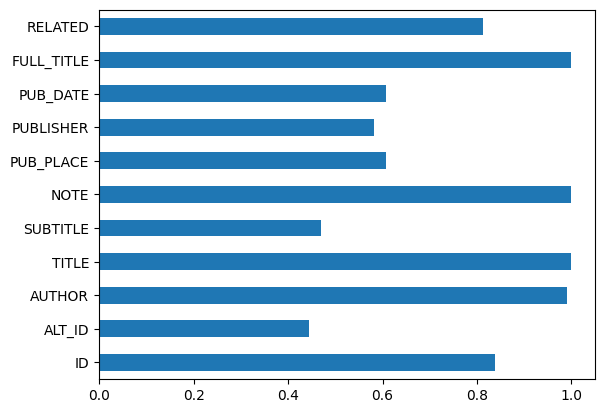

In [36]:
percentages_missing.plot(kind='barh')

However, we can go even further, and use the awesome library `missingno` to quickly visualize missing data within a dataset. `.matrix()` will create a graphical representation of the DataFrame in terms of data completeness.

<Axes: >

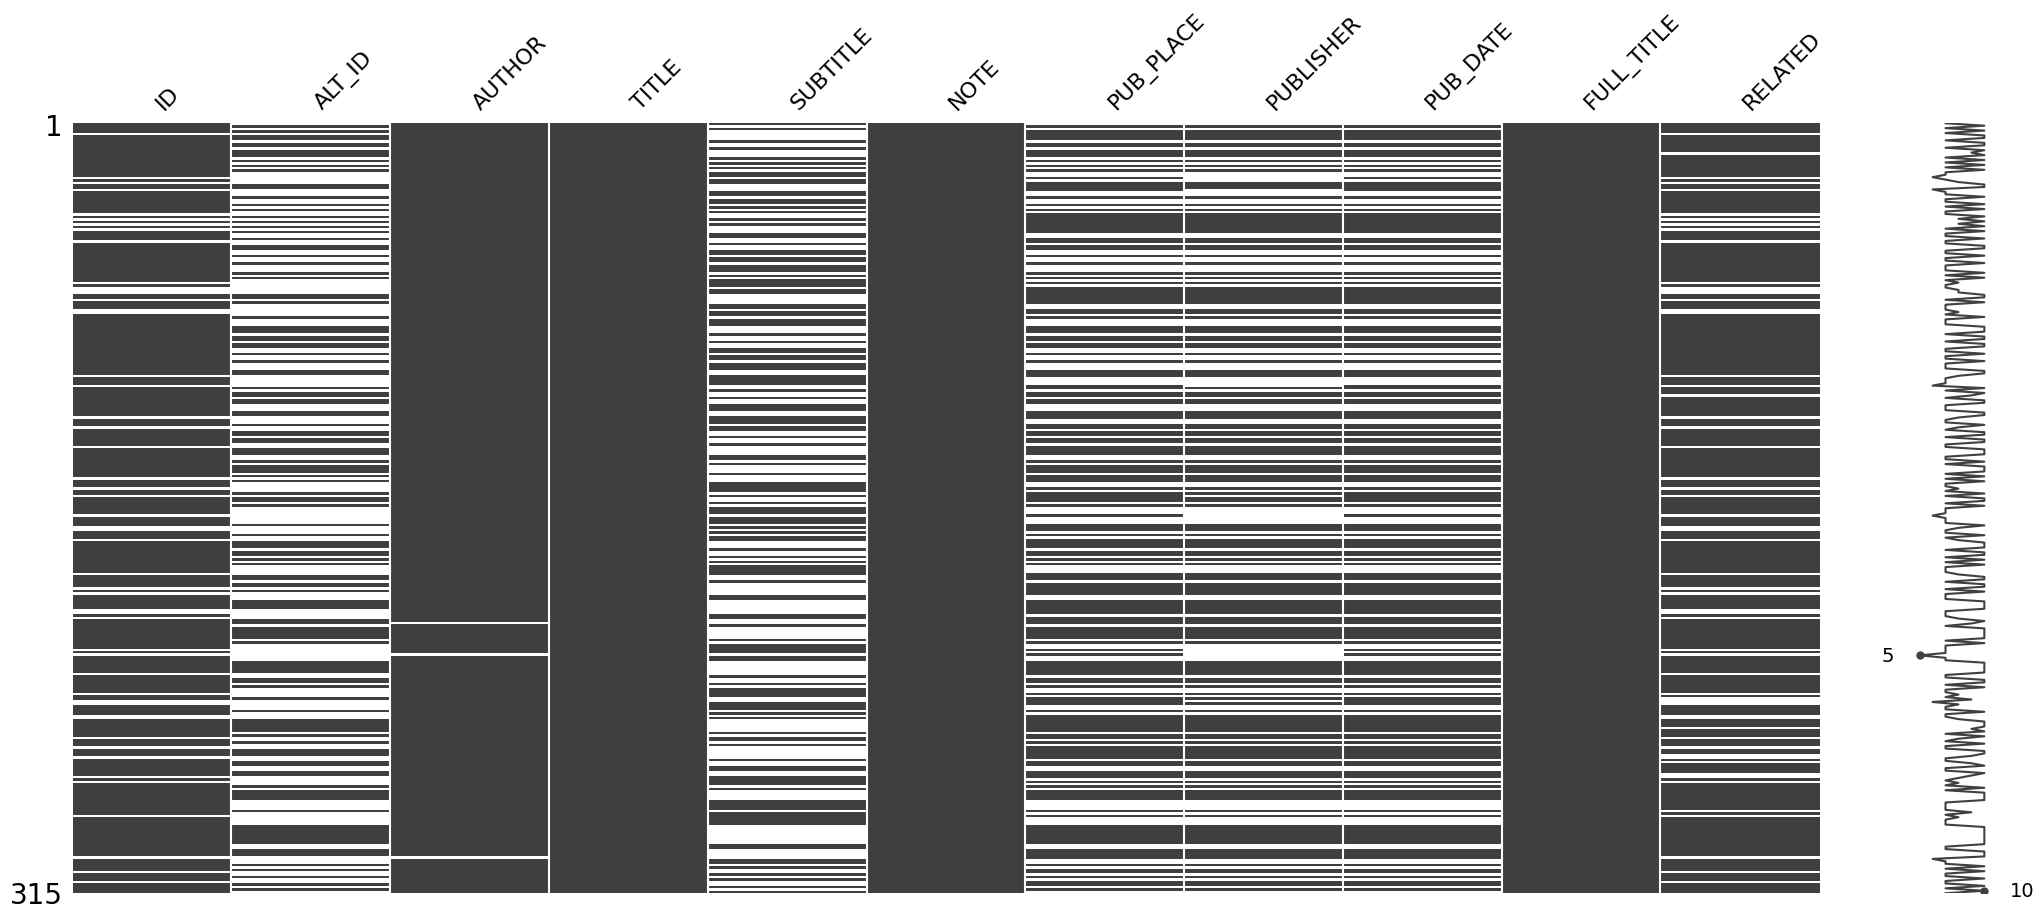

In [37]:
msgno.matrix(df)

Since identifiers are the main reference mechanism we will use to generate a URI for each record during the RDF conversion process, the missing values in the `ID` column will be the main problem we will have to deal with.

First, let's see in detail those records that are missing their identifiers, among other information

In [38]:
df[df['ID'].isna()]

,ID,ALT_ID,AUTHOR,TITLE,SUBTITLE,NOTE,PUB_PLACE,PUBLISHER,PUB_DATE,FULL_TITLE,RELATED
4,None,None,"Weismann, August",Uber den Einfluss der Isolirung auf die Artbil...,None,,Leipzig,Verlag von Wilhelm Engelmann,1872,Uber den Einfluss der Isolirung auf die Artbil...,None
22,None,None,"De la Beche, Henry Thomas",A selection of the Geological Memoirs containe...,None,,London,None,1824,A selection of the Geological Memoirs containe...,None
24,None,None,"Lyell, Charles",Principles of geology,or the modern changes of the earth and its inh...,,London,John Murray,1867,Principles of geology or the modern changes of...,None
27,None,None,"Frank, Albert Bernhard",Beiträge zur Pflanzenphysiologie /,None,,Leipzig,None,1868,Beiträge zur Pflanzenphysiologie /,None
37,None,None,"Pernety, Antoine Joseph",Journal historique d'un voyage fait aux I^les ...,None,,Berlin,Etienne de Bourdeaux,1769,Journal historique d'un voyage fait aux I^les ...,None
39,None,None,"Murphy, Joseph John",Habit and intelligence in their connexion with...,a series of scientific essays.,Published in two volumes,London,Macmillan,1869,Habit and intelligence in their connexion with...,None
41,None,None,"Quatrefages de Breau, Jean Louis Armand de",Physiologie comparee,metamorphoses de l'homme et des animaux /,,Paris,J.B. Baillie`re et Fils,1862,Physiologie comparee metamorphoses de l'homme ...,None
43,None,None,La Cépède,Histoire naturelle des cétacées. Tom. 1,None,,Paris,Didot,1809,Histoire naturelle des cétacées. Tom. 1,None
48,None,None,"Puvis, Marc Antoine",De la dégénération et de l'extinction des v...,None,,Paris,Huzard,1837,De la dégénération et de l'extinction des v...,None
65,None,None,"Berkenhout, John",Clavis Anglíca linguæ botanicæ,"or, a Botanical Lexicon in which the terms of ...",,London,"Becket, de Houdt, Hawes, Clark & and Collins",1764.,"Clavis Anglíca linguæ botanicæ or, a Botanica...",None


In [39]:
df['ID'].isna().value_counts()

ID
False    264
True      51
Name: count, dtype: int64

In [40]:
df['ID'].isna().value_counts(normalize=True)

ID
False    0.838095
True     0.161905
Name: proportion, dtype: float64

In [46]:
df[df['ID'].fillna('').str.contains('noauthor')]

,ID,ALT_ID,AUTHOR,TITLE,SUBTITLE,NOTE,PUB_PLACE,PUBLISHER,PUB_DATE,FULL_TITLE,RELATED
204,noauthor2006yi23A,1117,None,The rabbit book,None,Location: Cambridge. Identifier: noauthor2006y...,London,Journal of Horticulture,NaN,The rabbit book,noauthor2006yi23A_MS


Now, we can deal with these missing data in various ways

on one hand, identifiers in the `ID` column are quite necessary

on the other hand, `ALT_ID` are nice to have but not necessary

`RELATED` values are very important to connect our data in a graph structure, but it is difficult (if not impossible) to automatically determine whether a record is effectively related to another or not. 

Moreover, we can notice that some of these records with missing identifiers are also repeated, so we also have to take into consideration the possibility of deleting doubles

Now, we can notice that a `ID` value is structured as follows:
> [author's surname][(publication) date][letter][letter][digit][digit][letter][_MS (if Darwin's supplement material)]

So by using the author's surname and the publication date coupled with some randomization mechanism, we can generate unique IDs that follow the same pattern of the others. However, we should also take into consideration further exceptions, namely those rows missing both the identifier _and_ the author (219, 230). In those cases, we will have to resort to using publication date with the randomization mechanism.

In [42]:
metadata_clean = {
    
}

In [43]:
pq.write_table(table, '2024-01-16_darwinslibrary_v02.parquet', compression='GZIP')

With all this in mind, we can proceed with data cleaning. but how

given our need to both clean and reconcile our data, taking a small step back from python for a moment might be a good idea

we can use openrefine?